## Data review

In [1]:
# download libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load data
path = ''  
data = pd.read_csv(path, sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
# review of dataset
display(data.info())
# look at first rows
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


## Data preprocessing

In [5]:
## fill NA values in `living_area` by median area of rooms
data['living_area'] = data['living_area'].fillna(data.groupby('rooms')['living_area'].transform('median'))
# check
data['living_area'].isna().value_counts()

False    23699
Name: living_area, dtype: int64

In [6]:
# delete NA values in balcony, kitchen_area, parks_around3000, ponds_around3000
data['balcony'] = data['balcony'].fillna(0)
# fill NA values in kitchen_area by median
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
# check
print(data['balcony'].isna().value_counts())
print(data['kitchen_area'].isna().value_counts())

False    23699
Name: balcony, dtype: int64
False    23699
Name: kitchen_area, dtype: int64


In [7]:
# fill NA values in `days_exposition` by '-1' 
data['days_exposition'] = data['days_exposition'].fillna(-1)
# check
data['days_exposition'].isna().value_counts()

False    23699
Name: days_exposition, dtype: int64

In [8]:
# заполням пропуски в высоте потолков ceiling_height
# fill NA values in `ceiling_height` by median
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
# check
data['ceiling_height'].isna().value_counts()

False    23699
Name: ceiling_height, dtype: int64

### Change data type

In [9]:
# change data type
data = data.astype({
    'balcony': int,
    'floors_total': int,
    'cityCenters_nearest': int,
    'parks_around3000': int,
    'parks_nearest': int,
    'ponds_around3000': int,
    'ponds_nearest': int,
    'days_exposition': int,
    'is_apartment': bool
}, errors='ignore')
data['airports_nearest'] = data['airports_nearest'].astype(int, errors='ignore')
data['first_day_exposition'] = data['first_day_exposition'].str.replace('T','')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d%H:%M:%S')
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

## Create new columns

In [10]:
# price per square metre
data['price_square_metre'] = data['last_price'] / data['total_area']
data['price_square_metre']

0        120370.370370
1         82920.792079
2         92785.714286
3        408176.100629
4        100000.000000
             ...      
23694     72490.845228
23695     52542.372881
23696     44091.710758
23697    149511.400651
23698     41795.665635
Name: price_square_metre, Length: 23699, dtype: float64

In [11]:
# day of week, month and year of exposition
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year
data['day_exposition'] = data['first_day_exposition'].dt.day_name()
# check
data[['first_day_exposition', 'year_exposition', 'month_exposition', 'day_exposition']]

,first_day_exposition,year_exposition,month_exposition,day_exposition
0,2019-03-07,2019,3,Thursday
1,2018-12-04,2018,12,Tuesday
2,2015-08-20,2015,8,Thursday
3,2015-07-24,2015,7,Friday
4,2018-06-19,2018,6,Tuesday
...,...,...,...,...
23694,2017-03-21,2017,3,Tuesday
23695,2018-01-15,2018,1,Monday
23696,2018-02-11,2018,2,Sunday
23697,2017-03-28,2017,3,Tuesday


In [12]:
# function for floor category definitions
# first, top or other
def floor_category(row):
    """
    Возвращает категорию этажа: первый, послений или другой
    """
    floor_row = row['floor']
    floor_total_row = row['floors_total']
    if floor_row == 1:
        return 'первый'
    if floor_row == floor_total_row:
        return 'последний'
    
    return 'другой'

# apply function
data['floor_flat'] = data.apply(floor_category, axis=1)
# check
data[['floor', 'floors_total', 'floor_flat']]

,floor,floors_total,floor_flat
0,8,16.0,другой
1,1,11.0,первый
2,4,5.0,другой
3,9,14.0,другой
4,13,14.0,другой
...,...,...,...
23694,3,5.0,другой
23695,4,5.0,другой
23696,1,3.0,первый
23697,12,17.0,другой


In [13]:
# ratio of living and totol area
data['ratio_living_area'] = data['living_area'] / data['total_area']
# ration kitchen and total area
data['ratio_kitchen_area'] = data['kitchen_area'] / data['total_area']
# check
data[['living_area', 'kitchen_area', 'total_area', 'ratio_living_area', 'ratio_kitchen_area']]

,living_area,kitchen_area,total_area,ratio_living_area,ratio_kitchen_area
0,51.0,25.00,108.00,0.472222,0.231481
1,18.6,11.00,40.40,0.460396,0.272277
2,34.3,8.30,56.00,0.612500,0.148214
3,45.0,9.10,159.00,0.283019,0.057233
4,32.0,41.00,100.00,0.320000,0.410000
...,...,...,...,...,...
23694,73.3,13.83,133.81,0.547792,0.103356
23695,38.0,8.50,59.00,0.644068,0.144068
23696,29.7,9.10,56.70,0.523810,0.160494
23697,30.5,23.30,76.75,0.397394,0.303583


## Data research

Create hists for `total_area`, `last_price`, `rooms` and `ceiling_height`

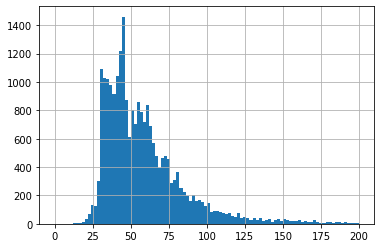

In [14]:
# hist of `total_area`
data['total_area'].hist(bins=100, range=(0, 200))
plt.show()

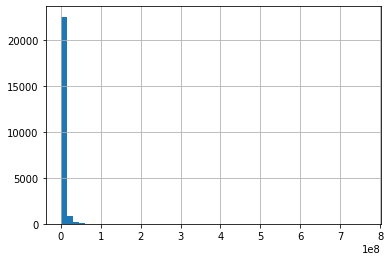

In [15]:
# hist of `last_price`
data['last_price'].hist(bins=50)
plt.show()

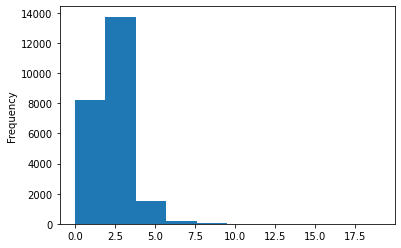

In [16]:
# hist of `rooms`
data['rooms'].plot(kind='hist')
plt.show()

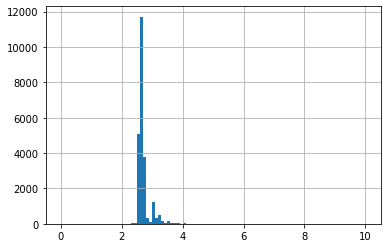

In [17]:
# hist of `ceiling_height`
data['ceiling_height'].hist(bins=100, range=(0, 10))
plt.show()

<b>Conclusion</b>
<br>
Most of apartments are presented with standard parametres: total area is about 50 square meter, ceiling height is near in 2.5, number rooms is 2-3

#### Research of apartment's sale time

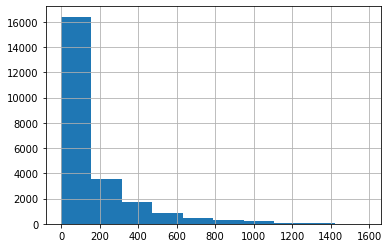

In [18]:
# hist of `days_exposition`
data['days_exposition'].hist()
plt.show()

In [19]:
# describe `days_exposition`
data['days_exposition'].describe()

count    23699.000000
mean       156.474619
std        213.645563
min         -1.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

<b>Conclusions</b>
<li>Average sale duration is 180 days, mead is 95 days (~ 3 month)</li>
<li>The mean is twise the median. There is may be emissions</li>
<li>Fast sale is expected in 45 days, long sale expected from 230 days</li>

#### Delete rare values

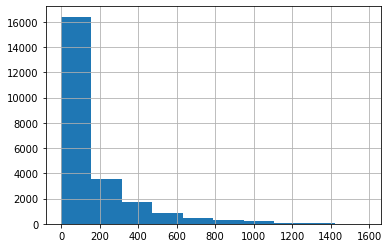

In [20]:
# hist of `days_exposition`
data['days_exposition'].hist()
plt.show()

There are ads with very long advertising periods: from 1000 days (~ 3 years)

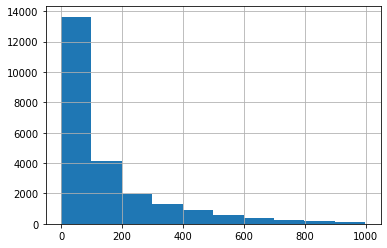

In [21]:
# delete it
data = data.query('days_exposition < 1000')
# check
data['days_exposition'].hist()
plt.show()

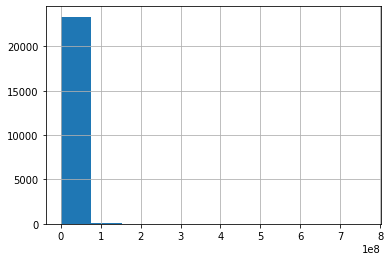

In [22]:
# hist of `last_price`
data['last_price'].hist()
plt.show()

There are ads with very expensive price

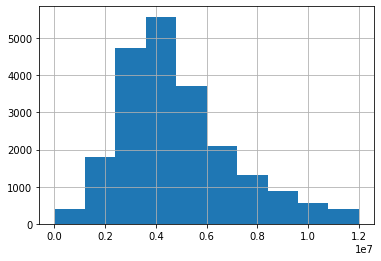

In [23]:
# delete expensive apartments
data = data.query('last_price < 12000000')
# check
data['last_price'].hist()
plt.show()

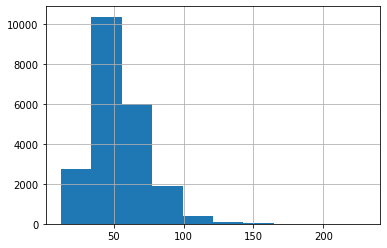

In [24]:
# find not normal values in `total_area`
data['total_area'].hist()
plt.show()

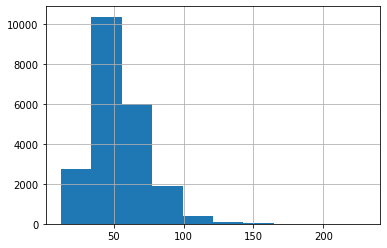

In [25]:
# delete it
data = data.query('total_area < 500')
# check
data['total_area'].hist()
plt.show()

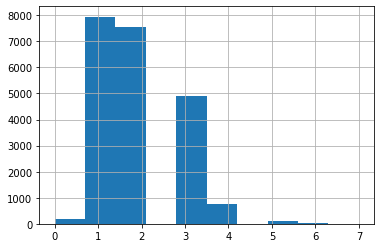

In [26]:
# hist of number of rooms
data['rooms'].hist()
plt.show()

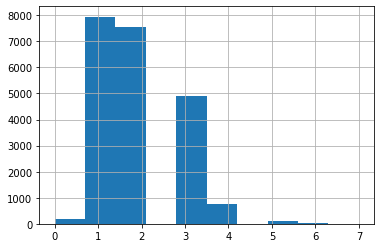

In [27]:
# select apartments with before 10 rooms
data = data.query('rooms < 10')
# check
data['rooms'].hist()
plt.show()

<b>Conclusion</b>
<br>
Dataset have not normal values of price, time exposition, number of rooms and total area.

#### Is there relation between price, number of rooms, total area and center nearest?

In [28]:
# relation
df_price_by_rooms_Centers_nearest_area = data[['last_price', 'rooms', 'cityCenters_nearest', 'total_area']]
df_price_by_rooms_Centers_nearest_area.corr()

,last_price,rooms,cityCenters_nearest,total_area
last_price,1.000000,0.455593,-0.345210,0.701165
rooms,0.455593,1.000000,-0.082713,0.803009
cityCenters_nearest,-0.345210,-0.082713,1.000000,-0.130470
total_area,0.701165,0.803009,-0.130470,1.000000


Price depends on the total area
#### Is there ralation between price and category of floor flat?

In [29]:
# realtion
df_price_by_floor_flat = data[['last_price', 'floor_flat']]
df_price_by_floor_flat.pivot_table(index='floor_flat', values='last_price')

,last_price
floor_flat,
другой,5.045536e+06
первый,4.119740e+06
последний,4.498471e+06


Price depends on the category of floor flat.
#### Is there relation between price and year of expositions?

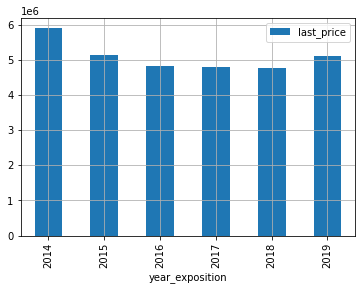

In [30]:
# relation
df_price_by_time = data[['last_price', 'year_exposition', 'month_exposition', 'day_exposition']]
df_price_by_time.pivot_table(index='year_exposition', values='last_price').reset_index().plot(x='year_exposition', y='last_price', kind='bar', grid=True, style='-o')
plt.show()

Prices have fallen since 2015
#### Is there ralation between price and month of exposition?

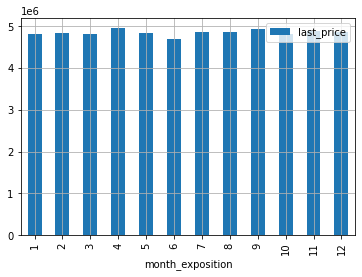

In [31]:
# ralation
df_price_by_time.pivot_table(index='month_exposition', values='last_price').reset_index().plot(x='month_exposition', y='last_price', grid=True, kind='bar')
plt.show()

Price doesn't changes a lot during year
#### Is there relation between price and day of week?

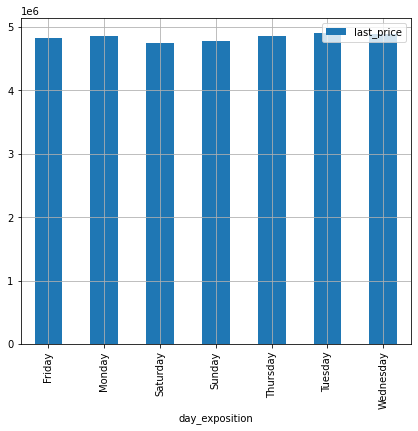

In [32]:
# relation
df_price_by_time.pivot_table(index='day_exposition', values='last_price').reset_index().plot(x='day_exposition', y='last_price', kind='bar', figsize=(7, 6), grid=True)
plt.show()

Price also doesn't change a lot during a week
#### TOP-10 cities with most number of ads

In [33]:
df_locality_name_top10 = data.pivot_table(index='locality_name', values='price_square_metre', aggfunc=['count', 'mean']).sort_values(by=('count', 'price_square_metre'), ascending=False).head(10)
df_locality_name_top10

,count,mean
,price_square_metre,price_square_metre
locality_name,,
Санкт-Петербург,13642,105487.646509
посёлок Мурино,517,85867.847825
посёлок Шушары,436,78615.807525
Всеволожск,393,67245.219949
Колпино,334,75130.848464
Пушкин,334,100329.356291
посёлок Парголово,326,90103.136772
Гатчина,305,68421.902770


#### City with most expensive average price per square meter

In [34]:
df_locality_name_top10.reset_index().sort_values(by=('mean', 'price_square_metre'), ascending=False).head(1)

,locality_name,count,mean
,,price_square_metre,price_square_metre
0,Санкт-Петербург,13642,105487.646509


#### City with the lowest average price per square meter

In [35]:
df_locality_name_top10.reset_index().sort_values(by=('mean', 'price_square_metre'), ascending=False).tail(1)

,locality_name,count,mean
,,price_square_metre,price_square_metre
9,Выборг,235,57911.258095


It is expected that the largest number of publications in St.Petersburg. Alse there are the most expensive apartments

#### What area is included in the center of St.Petersburg?

In [36]:
# select ads from St.Petersburg
df_locality_name_spb = data.query('locality_name == "Санкт-Петербург"')
df_locality_name_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_metre,month_exposition,year_exposition,day_exposition,floor_flat,ratio_living_area,ratio_kitchen_area
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.3,4,True,...,2.0,574.0,558,92785.714286,8,2015,Thursday,другой,0.612500,0.148214
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,True,...,1.0,48.0,121,100000.000000,6,2018,Tuesday,другой,0.320000,0.410000
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,30.5,22,True,...,0.0,NaN,-1,110544.692737,4,2019,Thursday,другой,0.425978,0.263966
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.6,7,True,...,0.0,NaN,289,88524.590164,2,2017,Sunday,другой,0.714754,0.106557
10,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.3,3,True,...,2.0,553.0,137,127525.252525,11,2017,Thursday,другой,0.512626,0.214646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.3,4,True,...,2.0,652.0,29,100566.572238,2,2018,Wednesday,другой,0.461756,0.257790
23690,3,5500000.0,52.00,2018-07-19,2,2.65,5.0,31.0,2,True,...,0.0,NaN,15,105769.230769,7,2018,Thursday,другой,0.596154,0.115385
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,True,...,1.0,806.0,519,129903.978052,10,2016,Thursday,другой,0.552812,0.145405
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,True,...,3.0,381.0,-1,72490.845228,3,2017,Tuesday,другой,0.547792,0.103356


In [37]:
# create column with distance to center (km)
df_locality_name_spb['cityCenters_nearest'] = df_locality_name_spb['cityCenters_nearest'].fillna(df_locality_name_spb['cityCenters_nearest'].median())
df_locality_name_spb['cityCenters_nearest_km'] = df_locality_name_spb['cityCenters_nearest'] / 1000
df_locality_name_spb['cityCenters_nearest_km'] = df_locality_name_spb['cityCenters_nearest_km'].astype(int)

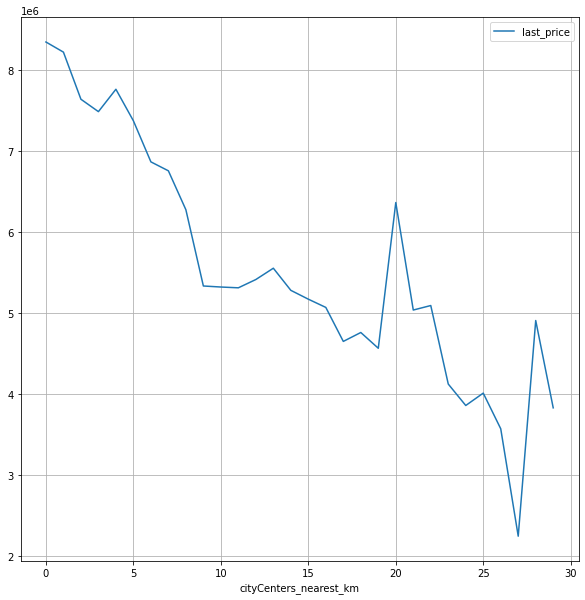

In [38]:
# average price per km
df_locality_name_spb.pivot_table(index='cityCenters_nearest_km', values='last_price').reset_index().plot(x='cityCenters_nearest_km', y='last_price', figsize=(10,10), grid=True)
plt.show()

Center of city is about 5 km
#### Analys apartments in city center

In [39]:
# select apartmetns in the center
df_spb_center = df_locality_name_spb.query('cityCenters_nearest_km <= 5')

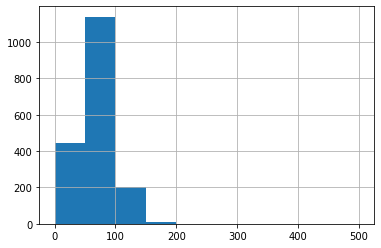

In [40]:
# hist for `total_area`
df_spb_center['total_area'].hist(range=(0,500))
plt.show()

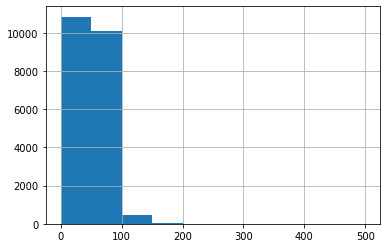

In [41]:
# hist for `total_area` of the all dataset
data['total_area'].hist(range=(0,500))
plt.show()

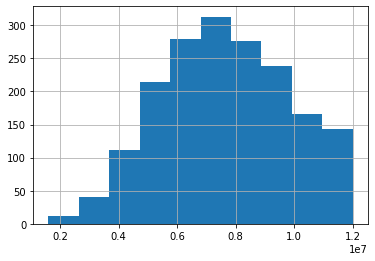

In [42]:
# hist price for St.Petersburg
df_spb_center['last_price'].hist()
plt.show()

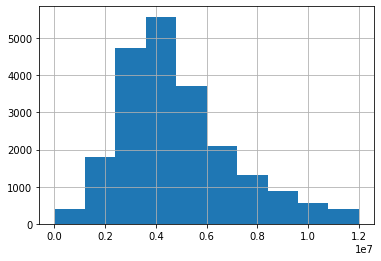

In [43]:
# hist price of the all dataset
data['last_price'].hist()
plt.show()

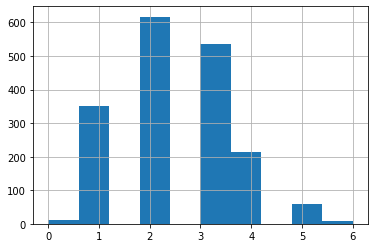

In [44]:
# hist number of rooms in St.Petersburg
df_spb_center['rooms'].hist()
plt.show()

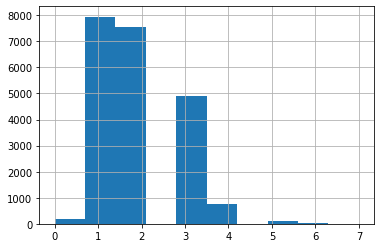

In [45]:
# hist number of rooms in the all dataset
data['rooms'].hist()
plt.show()

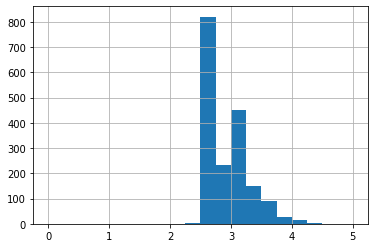

In [46]:
# разброс по высоте потолков в центре СПб
# hist `ceiling_height` in St.Petersburg
df_spb_center['ceiling_height'].hist(bins=20, range=(0,5))
plt.show()

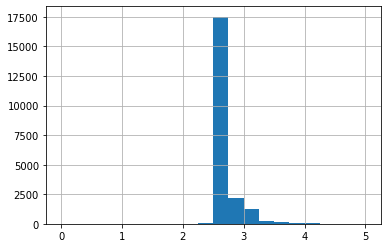

In [47]:
# hist `ceiling_height` in the all dataset
data['ceiling_height'].hist(bins=20, range=(0,5))
plt.show()

In [48]:
# correlation of ads in center of St.Petersburg
df_spb_center[['last_price', 'rooms', 'floor', 'cityCenters_nearest']].corr()

,last_price,rooms,floor,cityCenters_nearest
last_price,1.000000,0.501067,0.128698,-0.088963
rooms,0.501067,1.000000,-0.124446,-0.126821
floor,0.128698,-0.124446,1.000000,0.197394
cityCenters_nearest,-0.088963,-0.126821,0.197394,1.000000


In [49]:
# correlation of ads of all dataset
data[['last_price', 'rooms', 'floor', 'cityCenters_nearest']].corr()

,last_price,rooms,floor,cityCenters_nearest
last_price,1.000000,0.455593,0.129120,-0.345210
rooms,0.455593,1.000000,-0.181351,-0.082713
floor,0.129120,-0.181351,1.000000,-0.005898
cityCenters_nearest,-0.345210,-0.082713,-0.005898,1.000000


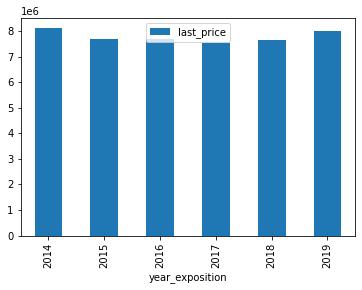

In [50]:
# dependence of price on the year of exposition
df_spb_center.pivot_table(index='year_exposition', values='last_price').reset_index().plot(x='year_exposition', y='last_price', kind='bar')
plt.show()

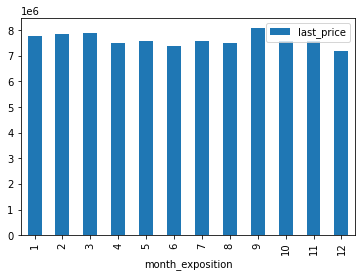

In [51]:
# dependence of price on the month of exposition
df_spb_center.pivot_table(index='month_exposition', values='last_price').reset_index().plot(x='month_exposition', y='last_price', kind='bar')
plt.show()

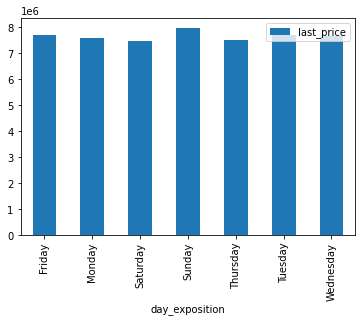

In [52]:
# dependence of price on the day of week of exposition
df_spb_center.pivot_table(index='day_exposition', values='last_price').reset_index().plot(x='day_exposition', y='last_price', kind='bar')
plt.show()

<b>Conclusions</b><br>
<li>Apartments from center of St.Petersburg have total area from 50 to 100 square meters</li>
<li>Aparments have more number of rooms than other ads</li>
<li>Most of apartments have high ceilings: from 3 meters</li>
<li>Price correlates with distance to center</li>
<li>In Saturday price different from other days</li>

## Result
- Most apartments is presented with standard parametres: total area is about 50 square meters, ceiling height is near in 2.5, number rooms is 2-3, prices before 10M
- Average sale time is 6 months
- Price dependes on th number of rooms and total area
- St.Petersburg have most number of advertising and most expensive apartments
- Center of St.Petersburg have radius about 5 km. Apartments from center have more total area, number of rooms and prices.